<a href="https://colab.research.google.com/github/sebinefrancis/Deep-Learning-Exercise/blob/Dog_vs_Cat_CNN/Dog_vs_Cat_CNN/Dogs%20vs.%20Cats%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# to keep colab gpu instance connected, run this in browser console
"""
function ClickConnect(){
            console.log('Working');
            document.querySelector('colab-connect-button').shadowRoot.getElementById('connect').click()
}
setInterval(ClickConnect,60000)
"""

#GITHUB COMMIT BRANCH AND PATH
# Dog_vs_Cat_CNN/Dogs vs. Cats CNN.ipynb

In [8]:
#One time set up for kaggle api in colab. Copy each set and run. or run cells below
#! pip install -q kaggle

#from google.colab import files
#files.upload()
#! mkdir ~/.kaggle  #created at '../root/'
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! pip install --upgrade --force-reinstall --no-deps kaggle
# ! kaggle datasets list #test api
#! ls
# import os
# os.listdir('../root/.kaggle') #this is where .kaggle folder is located. You can't see hidden folders in file browser

#first go to this kaggle competition page>rules>accept terms. Then only download works
#!kaggle competitions download -c dogs-vs-cats #download dataset
#!unzip dogs-vs-cats.zip -d kaggle_original_data/
#!unzip kaggle_original_data/train.zip -d kaggle_original_data/ #already train is zipped in a folder. 
# Don't browse this folder in left file browser, webbrowser will hang, because of too many files


# !rm -r kaggle_original_data/train/ delete files recursively !!!!! if needed !!!!

Saving kaggle.json to kaggle.json


[]

In [0]:
from google.colab import files
files.upload()

In [0]:
! pip install --upgrade --force-reinstall --no-deps kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle competitions download -c dogs-vs-cats #download dataset
!unzip dogs-vs-cats.zip -d kaggle_original_data/
!unzip kaggle_original_data/train.zip -d kaggle_original_data/ #already train is zipped in a folder.

In [21]:
#!rm -r cats_and_dogs_small
#! cp '/drive/My Drive/Colab Notebooks/ColabFiles/kaggle.json' ~/.kaggle/

/bin/bash: cp /drive/My Drive/Colab Notebooks/ColabFiles/kaggle.json: No such file or directory


**Prepare our smaller dataset**

In [0]:
import os, shutil
#Path to the directory where the original dataset was uncompressed
original_dataset_dir = 'kaggle_original_data/train'

if os.path.exists(original_dataset_dir): #only if data set is downloaded

    # Directory where you’ll store your smaller dataset
    base_dir = 'cats_and_dogs_small'
    os.mkdir(base_dir)

    #Directories for the training,validation, and test splits
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)

    #Directory with training cat pictures
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)

    #Directory with training dog pictures
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)

    #Directory with validation cat pictures
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)

    #Directory with validation dog pictures
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)

    #Directory with test cat pictures
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)

    #Directory with test dog pictures
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)

    #Copies the first 1,000 cat images to train_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 cat images to validation_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 cat images to test_cats_dir
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the first 1,000 dog images to train_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 dog images to validation_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)

    #Copies the next 500 dog images to test_dogs_dir
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)

As a sanity check, let’s count how many pictures are in each training split (train/validation/
test):

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


**Instantiating a small convnet for dogs vs. cats classification**

In [17]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

**Data preprocessing**

Using ImageDataGenerator to read images from directories

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150), #Resizes all images to 150 × 150
                    batch_size=20,
                    class_mode='binary') # Because you use binary_crossentropy loss, you need binary labels.
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Understanding Python generators**

A Python generator is an object that acts as an iterator: it’s an object you can use
with the for … in operator. Generators are built using the yield operator.

Here is an example of a generator that yields integers:

In [19]:
def generator():
    i = 0
    while True:
        i += 1
        yield i
for item in generator():
    print(item)
    if item > 4:
      break

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

1
2
3
4
5
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**Fitting the model using a batch generator**

In [20]:
history = model.fit_generator(
                  train_generator,
                  steps_per_epoch=100,
                  epochs=30,
                  validation_data=validation_generator,
                  validation_steps=50)
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 106s 1s/step - loss: 0.6943 - acc: 0.5120 - val_loss: 0.6944 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.6629 - acc: 0.6010 - val_loss: 0.6910 - val_acc: 0.5600
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6183 - acc: 0.6590 - val_loss: 0.6864 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 106s 1s/step - loss: 0.5668 - acc: 0.7045 - val_loss: 0.5481 - val_acc: 0.6420
Epoch 5/30
100/100 [==============================] - 107s 1s/step - loss: 0.5484 - acc: 0.7210 - val_loss: 0.6863 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5121 - acc: 0.7465 - val_loss: 0.6391 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 104s 1s/step - loss: 0.4862 - acc: 0.7645 - val_loss: 0.5390 - val_acc: 0.6880
Epoch 8/30
100/100 [==============================] - 105s 1s/step - 

**Displaying curves of loss and accuracy during training**

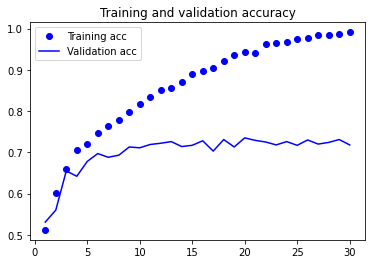

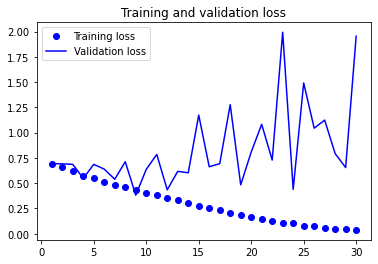

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Using data augmentation**

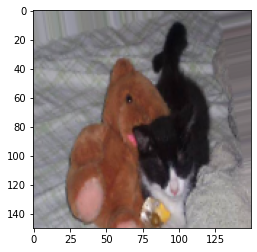

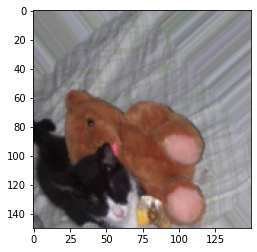

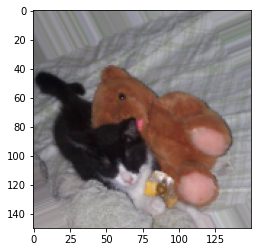

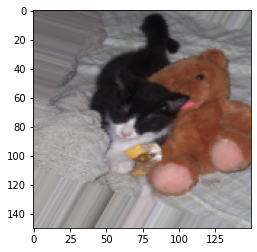

In [25]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
from keras.preprocessing import image #Module with imagepreprocessing utilities
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] #Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150)) #Reads the image and resizes it
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

**Defining a new convnet that includes dropout**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

**Training the convnet using data-augmentation generators**

In [27]:
train_datagen = ImageDataGenerator(
                          rescale=1./255,
                          rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) #Note that the validation data shouldn’t be augmented!

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150), #Resizes all images to 150 × 150
                    batch_size=32,
                    class_mode='binary') #Because you use binary_crossentropy loss, you need binary labels.

validation_generator = test_datagen.flow_from_directory(
                            validation_dir,
                            target_size=(150, 150),
                            batch_size=32,
                            class_mode='binary')

history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50)

model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_2.h5') #save the model

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 183s 2s/step - loss: 0.6918 - acc: 0.5208 - val_loss: 0.6834 - val_acc: 0.5876
Epoch 2/100
100/100 [==============================] - 179s 2s/step - loss: 0.6790 - acc: 0.5644 - val_loss: 0.6796 - val_acc: 0.5870
Epoch 3/100
100/100 [==============================] - 180s 2s/step - loss: 0.6657 - acc: 0.5999 - val_loss: 0.7303 - val_acc: 0.5755
Epoch 4/100
100/100 [==============================] - 178s 2s/step - loss: 0.6368 - acc: 0.6282 - val_loss: 0.5680 - val_acc: 0.6521
Epoch 5/100
100/100 [==============================] - 182s 2s/step - loss: 0.6271 - acc: 0.6416 - val_loss: 0.6042 - val_acc: 0.6726
Epoch 6/100
100/100 [==============================] - 181s 2s/step - loss: 0.6116 - acc: 0.6567 - val_loss: 0.7846 - val_acc: 0.6443
Epoch 7/100
100/100 [==============================] - 179s 2s/step - loss: 0.5970 - acc: 0.6789 - val_loss: 0.7

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/ColabFiles/cats_and_dogs_small_2.h5') #save the model

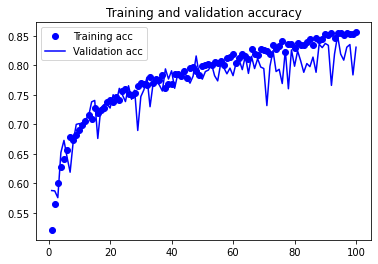

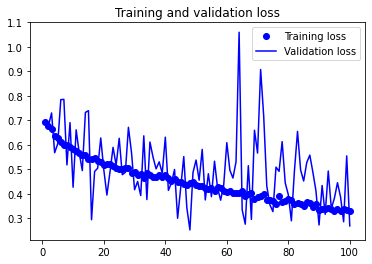

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()